In [1]:
import camelot as cm


In [4]:
input_pdf = cm.read_pdf("C:\\Users\\gf\\Desktop\\Automation\\india_factsheet_economic_n_hdi.pdf")

In [5]:
input_pdf


<TableList n=3>

In [7]:
for n in input_pdf:
    print(n)

<Table shape=(4, 3)>
<Table shape=(15, 3)>
<Table shape=(14, 4)>


In [8]:
input_pdf[1].df

,0,1,2
0,Economic Indicators,2005-06,2010
1,4\nGross Domestic Product (Current US $) (mill...,834035,1727111
2,,2005-06,2009-10
3,5\nContribution of Agriculture to GDP (%),,14.62
4,6\nContribution of Industry to GDP (%),,20.16
5,7\nContribution of Services to GDP (%),,65.22
6,,2005-06,2009-10
7,8\nGNI per capita (current international $),2280,3550
8,,2005-06,2009-10
9,9\nGDP Growth Rate (%),9.5,8.0


In [9]:
df = input_pdf[1].df.loc[8:14, 0:2]
df

,0,1,2
8,,2005-06,2009-10
9,9\nGDP Growth Rate (%),9.5,8.0
10,,2004-05,2009-10
11,10\nWorker Population Ratio Male (usual princi...,53.6,53.8
12,11\nWorker Population Ratio Rate Female (usual...,21.5,18.0
13,,2005,2010
14,"12\nInflation, Consumer Prices (annual %)",4.25,11.99


In [10]:
df = df.reset_index(drop= True)

In [11]:
df.columns = ["KPI","2001","2011"]

In [12]:
df

,KPI,2001,2011
0,,2005-06,2009-10
1,9\nGDP Growth Rate (%),9.5,8.0
2,,2004-05,2009-10
3,10\nWorker Population Ratio Male (usual princi...,53.6,53.8
4,11\nWorker Population Ratio Rate Female (usual...,21.5,18.0
5,,2005,2010
6,"12\nInflation, Consumer Prices (annual %)",4.25,11.99


In [15]:
df.drop([0,2,6], axis=0, inplace=True)
df

,KPI,2001,2011
1,9\nGDP Growth Rate (%),9.5,8.0
3,10\nWorker Population Ratio Male (usual princi...,53.6,53.8
4,11\nWorker Population Ratio Rate Female (usual...,21.5,18.0
5,,2005,2010


In [16]:
df.drop([5],axis=0,inplace=True)

In [17]:
df

,KPI,2001,2011
1,9\nGDP Growth Rate (%),9.5,8.0
3,10\nWorker Population Ratio Male (usual princi...,53.6,53.8
4,11\nWorker Population Ratio Rate Female (usual...,21.5,18.0


In [18]:
df.loc[:,["2001","2011"]] = df.loc[:,["2001","2011"]].astype(float)

In [19]:
df

,KPI,2001,2011
1,9\nGDP Growth Rate (%),9.5,8.0
3,10\nWorker Population Ratio Male (usual princi...,53.6,53.8
4,11\nWorker Population Ratio Rate Female (usual...,21.5,18.0


In [20]:
df.to_csv("FactIndia.csv")

In [22]:
df

,KPI,2001,2011
1,9\nGDP Growth Rate (%),9.5,8.0
3,10\nWorker Population Ratio Male (usual princi...,53.6,53.8
4,11\nWorker Population Ratio Rate Female (usual...,21.5,18.0


In [27]:
df.to_excel("FactIndia.xlsx")

In [25]:
import pandas as pd

In [28]:
df2 = pd.read_csv("FactIndia.csv")

In [29]:
df2

,Unnamed: 0,KPI,2001,2011
0,1,9\nGDP Growth Rate (%),9.5,8.0
1,3,10\nWorker Population Ratio Male (usual princi...,53.6,53.8
2,4,11\nWorker Population Ratio Rate Female (usual...,21.5,18.0


In [30]:
import seaborn as sns

In [31]:
df_melted = df.melt('KPI', var_name='year', value_name='percentage')

In [32]:
df_melted

,KPI,year,percentage
0,9\nGDP Growth Rate (%),2001,9.5
1,10\nWorker Population Ratio Male (usual princi...,2001,53.6
2,11\nWorker Population Ratio Rate Female (usual...,2001,21.5
3,9\nGDP Growth Rate (%),2011,8.0
4,10\nWorker Population Ratio Male (usual princi...,2011,53.8
5,11\nWorker Population Ratio Rate Female (usual...,2011,18.0


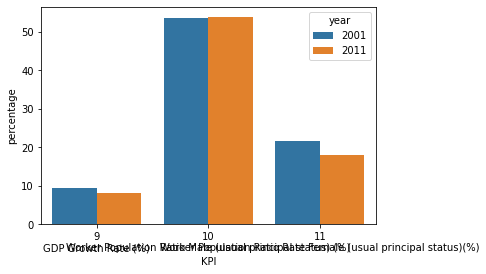

In [40]:
sns.barplot(x= 'KPI', y = 'percentage',hue = 'year', data = df_melted);